In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:08<00:00, 21.9MB/s]
100% 163M/163M [00:08<00:00, 19.8MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3104.jpg', 'with_mask_3073.jpg', 'with_mask_1381.jpg', 'with_mask_2269.jpg', 'with_mask_2741.jpg']
['with_mask_84.jpg', 'with_mask_1854.jpg', 'with_mask_989.jpg', 'with_mask_1719.jpg', 'with_mask_2579.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3444.jpg', 'without_mask_3233.jpg', 'without_mask_2611.jpg', 'without_mask_1598.jpg', 'without_mask_1196.jpg']
['without_mask_3228.jpg', 'without_mask_2216.jpg', 'without_mask_1556.jpg', 'without_mask_2850.jpg', 'without_mask_3059.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

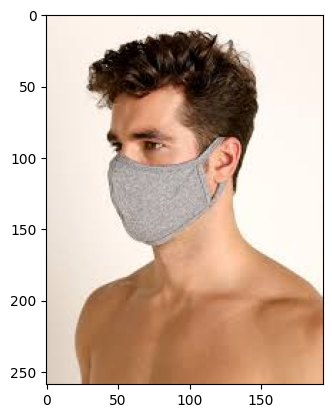

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_3104.jpg')
imgplot = plt.imshow(img)
plt.show()

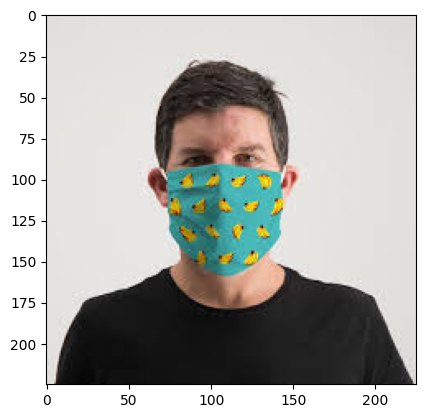

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2545.jpg')
imgplot = plt.imshow(img)
plt.show()

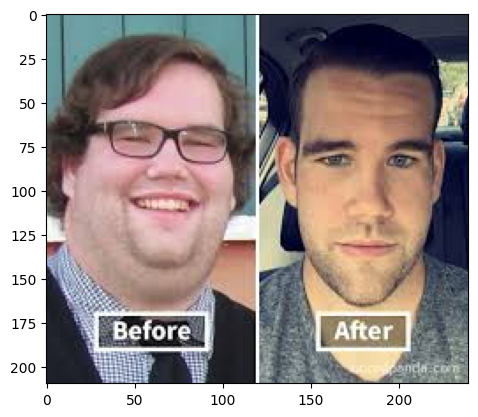

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_2545.jpg')
imgplot = plt.imshow(img)
plt.show()

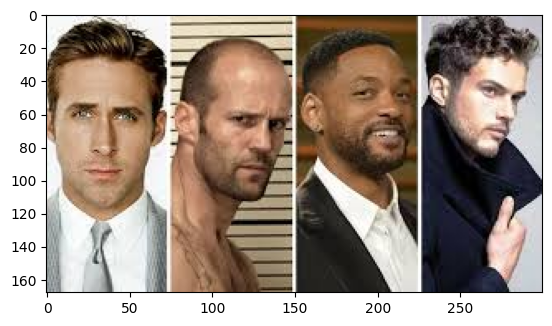

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2525.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_filee in without_mask_files:

  image = Image.open(without_mask_path + img_filee)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[250, 240, 231],
        [250, 240, 231],
        [250, 240, 231],
        ...,
        [253, 244, 237],
        [253, 244, 237],
        [253, 244, 237]],

       [[250, 240, 231],
        [250, 240, 231],
        [250, 240, 231],
        ...,
        [253, 244, 237],
        [253, 244, 237],
        [253, 244, 237]],

       [[250, 240, 231],
        [250, 240, 231],
        [250, 240, 231],
        ...,
        [253, 244, 237],
        [253, 244, 237],
        [253, 244, 237]],

       ...,

       [[218, 204, 191],
        [218, 204, 191],
        [219, 205, 192],
        ...,
        [239, 184, 142],
        [238, 183, 142],
        [237, 182, 141]],

       [[218, 204, 191],
        [218, 204, 191],
        [219, 205, 192],
        ...,
        [238, 183, 143],
        [238, 182, 142],
        [238, 181, 142]],

       [[218, 204, 191],
        [218, 204, 191],
        [219, 205, 192],
        ...,
        [236, 182, 143],
        [237, 180, 143],
        [239, 179, 142]]], dtype=uint8)
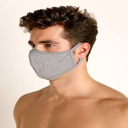

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[109, 107, 118],
        [114, 113, 121],
        [109, 107, 116],
        ...,
        [ 90,  97, 107],
        [ 90,  94, 105],
        [ 93,  97, 108]],

       [[110, 108, 119],
        [111, 108, 117],
        [110, 105, 114],
        ...,
        [ 86,  93, 103],
        [ 88,  92, 103],
        [ 89,  93, 104]],

       [[112, 107, 118],
        [113, 109, 118],
        [123, 117, 125],
        ...,
        [ 89,  95, 105],
        [ 91,  95, 106],
        [ 87,  91, 102]],

       ...,

       [[ 46,  66,  91],
        [ 45,  65,  90],
        [ 47,  67,  92],
        ...,
        [177, 143, 123],
        [176, 144, 123],
        [177, 145, 124]],

       [[ 49,  69,  93],
        [ 47,  67,  91],
        [ 46,  66,  90],
        ...,
        [179, 146, 126],
        [178, 146, 125],
        [177, 146, 125]],

       [[ 43,  63,  87],
        [ 43,  63,  87],
        [ 44,  64,  88],
        ...,
        [179, 147, 126],
        [177, 145, 124],
        [175, 144, 123]]

In [ ]:
X_train_scaled[0]

array([[[0.72941176, 0.67843137, 0.60392157],
        [0.68627451, 0.63529412, 0.56078431],
        [0.58431373, 0.53333333, 0.45882353],
        ...,
        [0.44705882, 0.39215686, 0.34117647],
        [0.4627451 , 0.40784314, 0.35686275],
        [0.47058824, 0.41568627, 0.36470588]],

       [[0.69411765, 0.64313725, 0.56470588],
        [0.65098039, 0.6       , 0.5254902 ],
        [0.55294118, 0.50196078, 0.42745098],
        ...,
        [0.44705882, 0.39215686, 0.34117647],
        [0.4627451 , 0.40784314, 0.35686275],
        [0.46666667, 0.41176471, 0.36078431]],

       [[0.61176471, 0.56078431, 0.48235294],
        [0.57647059, 0.52156863, 0.44705882],
        [0.48627451, 0.43137255, 0.35686275],
        ...,
        [0.45098039, 0.39607843, 0.34509804],
        [0.45882353, 0.40392157, 0.35294118],
        [0.45882353, 0.40784314, 0.35686275]],

       ...,

       [[0.17254902, 0.16078431, 0.16862745],
        [0.17254902, 0.16078431, 0.16862745],
        [0.17254902, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - acc: 0.7336 - loss: 0.5832 - val_acc: 0.8694 - val_loss: 0.3309
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - acc: 0.8828 - loss: 0.3151 - val_acc: 0.8826 - val_loss: 0.2762
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9064 - loss: 0.2373 - val_acc: 0.8860 - val_loss: 0.2445
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9262 - loss: 0.1803 - val_acc: 0.8975 - val_loss: 0.2491
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9395 - loss: 0.1552 - val_acc: 0.8992 - val_loss: 0.2495


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9209 - loss: 0.2119
Test Accuracy = 0.9172733426094055


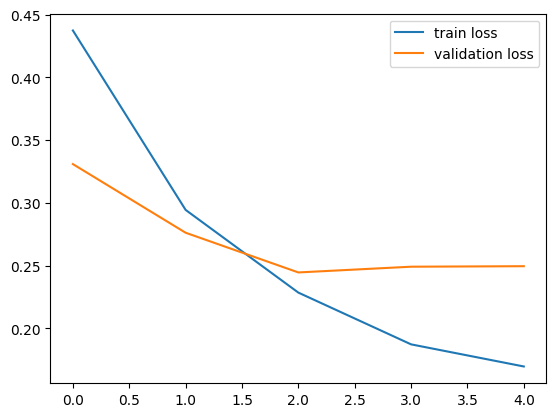

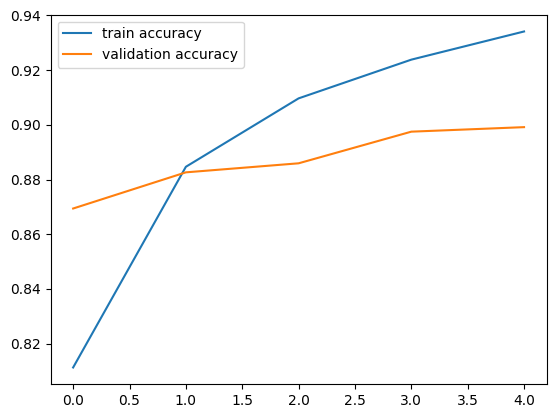

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test.png


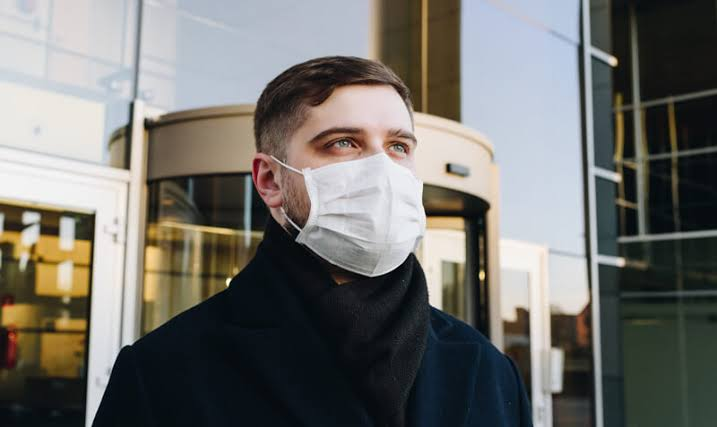

1/1 [==============================] - 0s 176ms/step
[[0.23994292 0.70647454]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test.jpg


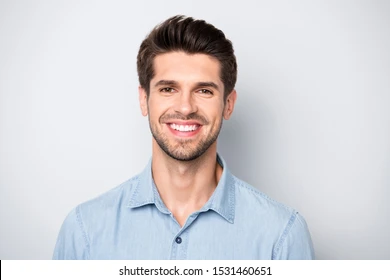

1/1 [==============================] - 0s 21ms/step
[[0.49811754 0.47740024]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/download (2).jpg


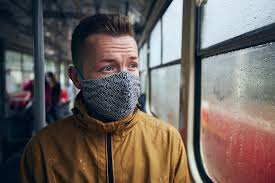

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.36429495 0.6346767 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')